In [1]:
import shap # v0.39.0 # needs numpy 1.22 or less
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import supportFiles.myFunc as myF
from sklearn.utils.random import sample_without_replacement as uSample

from joblib import load

In [2]:
shap.initjs()

Models/targets selected from previous tests that obtained good performance (MCC)

In [3]:
# Tests to run
models = ["us_MLP", "SVM"]
targets = ["NB15", "CIC-IDS"]
sources = {"NB15": ["BoT-IoT"], "CIC-IDS": ["BoT-IoT", "LAB-TRAP", "WAB-TRAP"]}

compatibilityMap = {"LAB-TRAP":0, "NB15":1, "CIC-IDS":2, "ToN-IoT":3, "BoT-IoT":4, "WAB-TRAP":5}

In [4]:
def get_model(model: str, source: str):
    
    # Filepath
    filepath = "./models/"
    
    old_name_map = {"LAB-TRAP":"AB-TRAP", "WAB-TRAP":"internet"}
    source = source if source not in old_name_map else old_name_map[source]

    # Preprocessing file
    pre_file = "SCAN_{}_CIC_{}prep.pkl".format(source, model[:(model.find("_")+1)])
    prep = load(filepath + pre_file)
    # Model file
    file = "SCAN_{}_CIC_{}.joblib".format(source, model)
    model = load(filepath + file)

    return model, prep

def explainTrial(model: str, X_test: pd.DataFrame):
    masker = shap.maskers.Independent(X_test, max_samples=100)
    explainer = shap.Explainer(model.best_estimator_.predict, masker=masker)
    shap_test = explainer(X_test)
    #print(f"Shap values length: {len(shap_test)}\n")
    #print(f"Sample shap value:\n{shap_test[0]}")
    return shap_test

In [5]:
# Get test target
def get_target(target, source, frac=None):
    W = {"NB15":.1, "CIC-IDS":1}
    testerDS = compatibilityMap[target]
    trainerDS = compatibilityMap[source]
    
    maxNumFilesToLoad = 96
    featureSet = 1 # CIC feature set
    # Get test data
    X, y = myF.setTarget(myF.loadDataset(testerDS, maxNumFilesToLoad, featureSet), testerDS, True, True, trainerDS)
    dist = y.value_counts()
    indexMax = dist.idxmax()
    toKill = uSample(n_population=dist[indexMax], n_samples=int((dist[indexMax]-dist[1-indexMax])*(frac or W.get(target, 0)) ))
    toKillIndex = (y[y == indexMax].index)[toKill]
    y.drop(toKillIndex, inplace=True)
    X.drop(toKillIndex, inplace=True)
    return X, y

## Automatically run groups

### Explain

In [5]:
explanations = {}
for target in targets:
    for source in sources[target]:
        X, y = get_target(target, source)
        for model in models:
            M, pre = get_model(model, source)
            X_test = pre.transform(X)
            shap_values = explainTrial(M, X_test)
            shap_values.feature_names = X.columns.to_list()
            explanations.update({"_".join([source,model,target]):[shap_values, y]})


Loading data set from existing file: NB15_CIC.csv
reading file: 
2023-10-14 23:19:54
setTarget: Removed 1911 flows from other attack types



Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid resul

Loading data set from existing file: CIC-IDS_CIC.csv
reading file: 
2023-10-15 00:01:49
setTarget: Removed 397751 flows from other attack types



Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid resul

Loading data set from existing file: CIC-IDS_CIC.csv
reading file: 
2023-10-15 05:33:58
setTarget: Removed 397751 flows from other attack types



Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid resul

Loading data set from existing file: CIC-IDS_CIC.csv
reading file: 
2023-10-15 12:15:09
setTarget: Removed 397751 flows from other attack types



Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid resul

### Analyse Importances

In [64]:
for name, (SV, _) in explanations.items():
    print(name)
    plt.figure
    shap.plots.bar(SV, max_display=15, show=False)
    plt.savefig("./explanations/SHAP_BAR_15_{0}.jpg".format(name), bbox_inches="tight")
    plt.close()

BoT-IoT_us_MLP_NB15
BoT-IoT_SVM_NB15
BoT-IoT_us_MLP_CIC-IDS
BoT-IoT_SVM_CIC-IDS
LAB-TRAP_us_MLP_CIC-IDS
LAB-TRAP_SVM_CIC-IDS
WAB-TRAP_us_MLP_CIC-IDS
WAB-TRAP_SVM_CIC-IDS


In [52]:
explanations['BoT-IoT_us_MLP_CIC-IDS'][0].feature_names

['dst_port',
 'protocol',
 'flow_duration',
 'tot_fwd_pkts',
 'tot_bwd_pkts',
 'totlen_fwd_pkts',
 'totlen_bwd_pkts',
 'fwd_pkt_len_max',
 'fwd_pkt_len_min',
 'fwd_pkt_len_mean',
 'fwd_pkt_len_std',
 'bwd_pkt_len_max',
 'bwd_pkt_len_min',
 'bwd_pkt_len_mean',
 'bwd_pkt_len_std',
 'flow_byts_s',
 'flow_pkts_s',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'fwd_iat_tot',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_tot',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'bwd_psh_flags',
 'bwd_urg_flags',
 'fwd_header_len',
 'bwd_header_len',
 'fwd_pkts_s',
 'bwd_pkts_s',
 'pkt_len_min',
 'pkt_len_max',
 'pkt_len_mean',
 'pkt_len_std',
 'pkt_len_var',
 'fin_flag_cnt',
 'syn_flag_cnt',
 'rst_flag_cnt',
 'psh_flag_cnt',
 'ack_flag_cnt',
 'urg_flag_cnt',
 'cwe_flag_count',
 'ece_flag_cnt',
 'down_up_ratio',
 'pkt_size_avg',
 'fwd_seg_size_avg',
 'bwd_seg_size_avg',
 'subflow_fwd_pkts',
 'subflow_fwd_byts',
 'subflow_bwd_p

### Using Cohorts

BoT-IoT_us_MLP_NB15


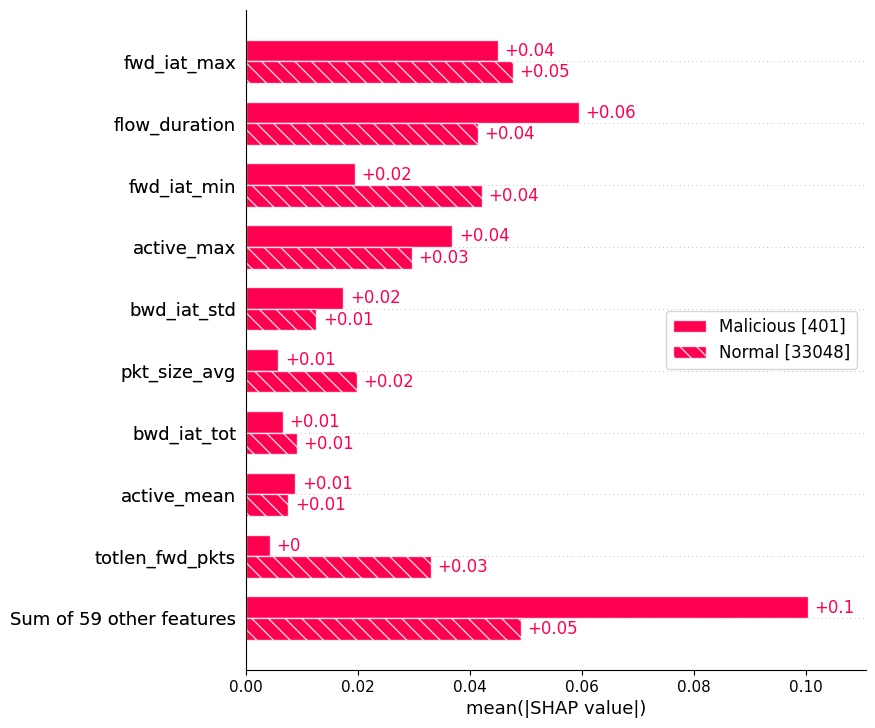

BoT-IoT_SVM_NB15


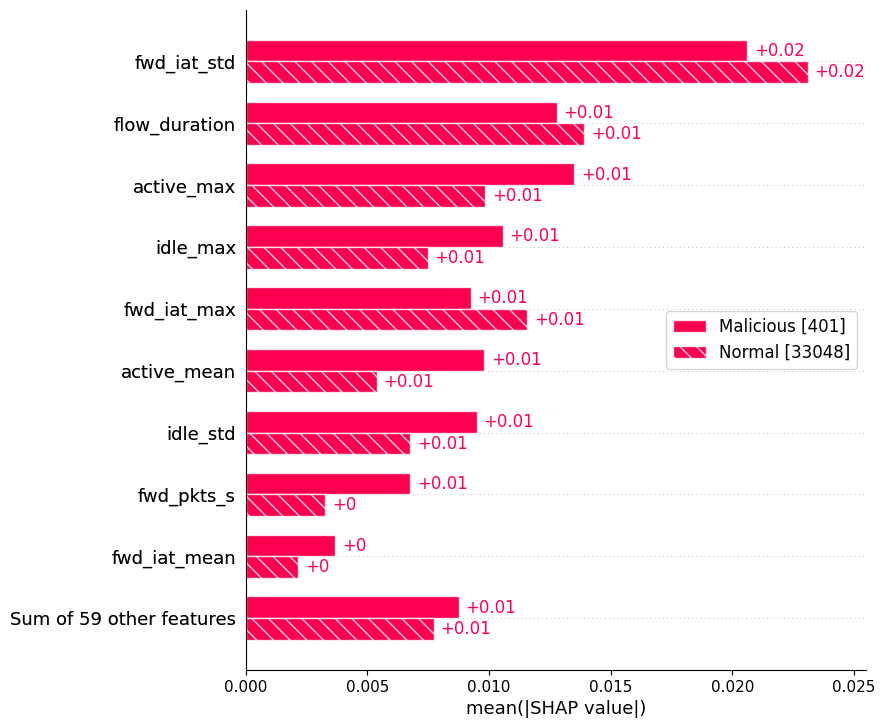

BoT-IoT_us_MLP_CIC-IDS


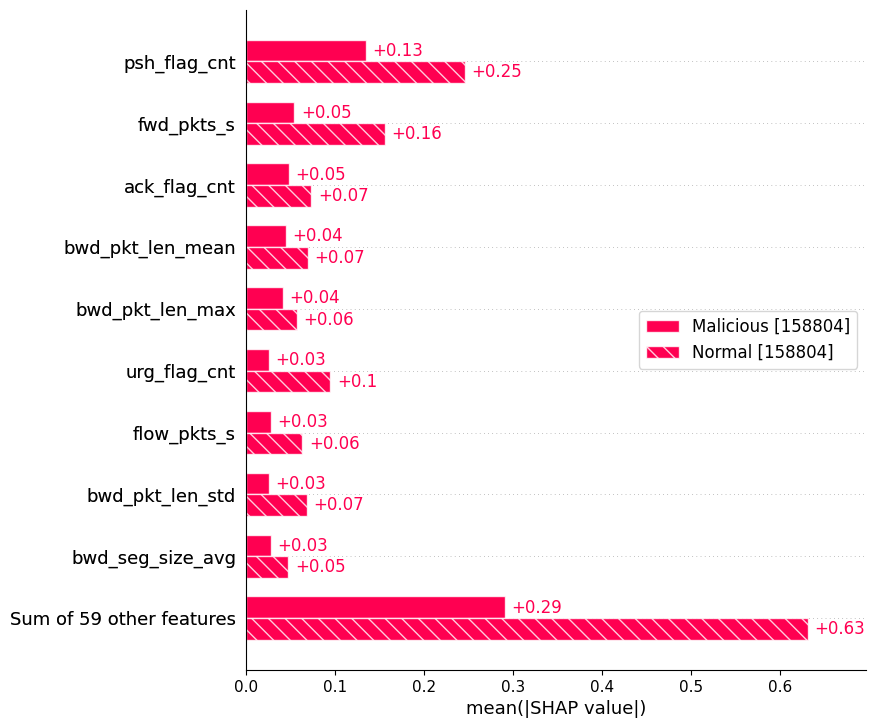

BoT-IoT_SVM_CIC-IDS


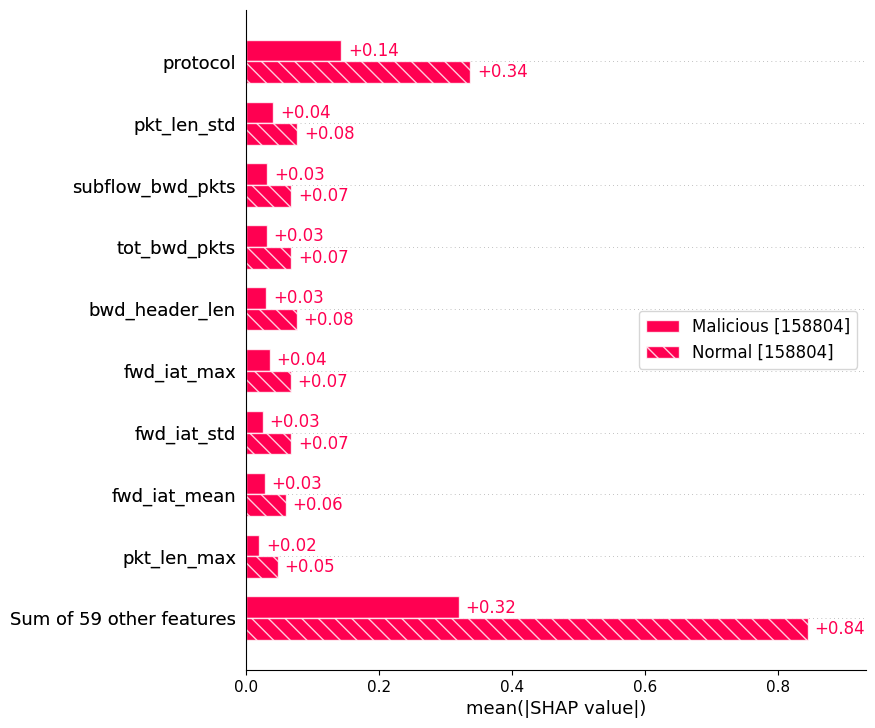

LAB-TRAP_us_MLP_CIC-IDS


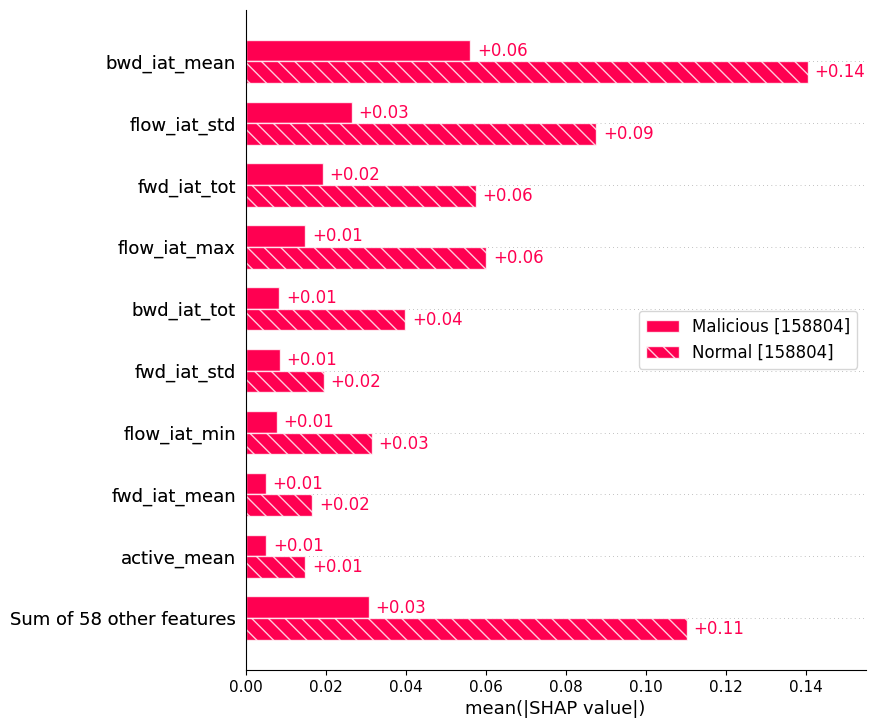

LAB-TRAP_SVM_CIC-IDS


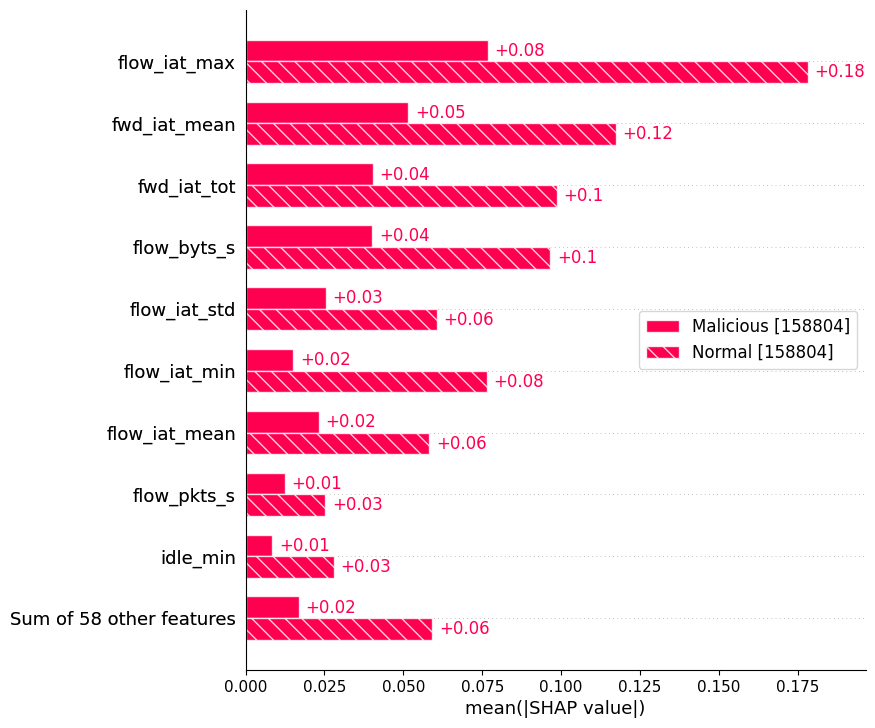

WAB-TRAP_us_MLP_CIC-IDS


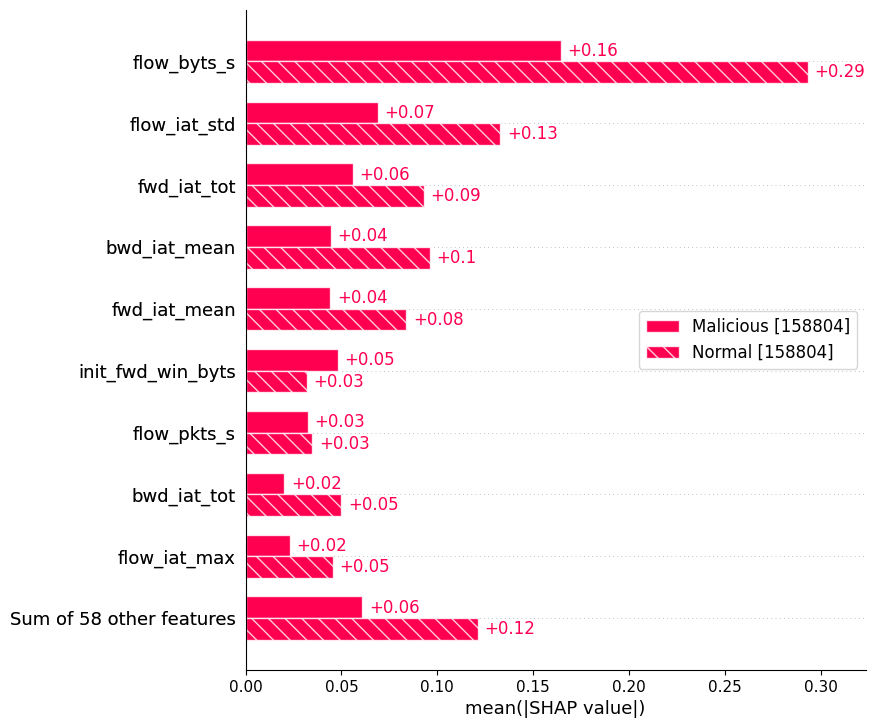

WAB-TRAP_SVM_CIC-IDS


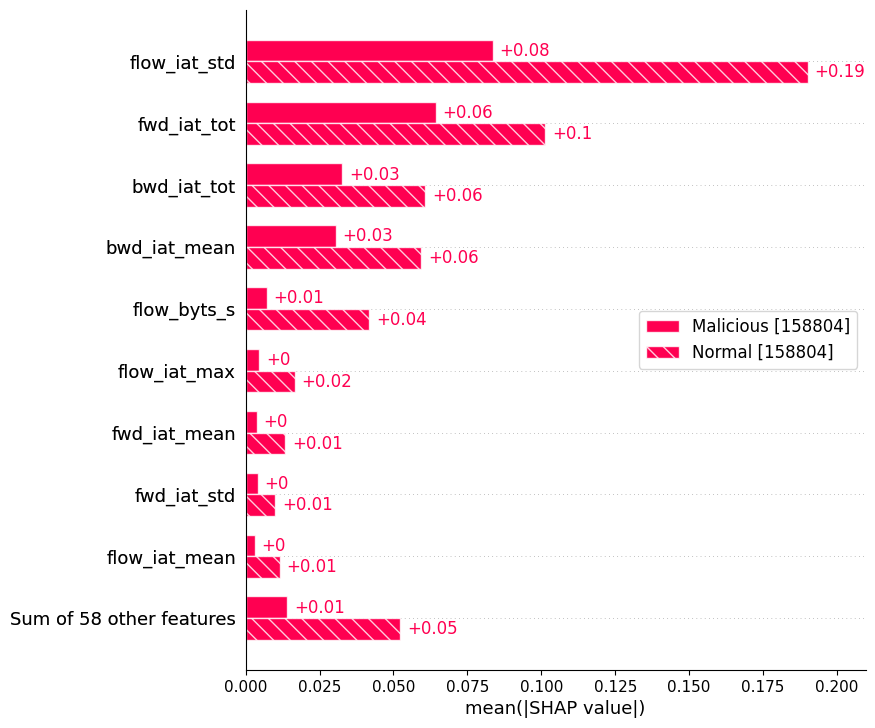

In [35]:
#bar plot
#_, axes = plt.subplots(len(explanations), 1, figsize=(5*len(explanations), 5))

for name, (local_shap_values, local_y) in explanations.items():
    print(name)
    plt.figure
    trafficType = ["Malicious" if x else "Normal" for x in local_y]
    shap.plots.bar(local_shap_values.cohorts(trafficType).abs.mean(0))
    plt.savefig("./explanations/SHAP_COHORT_BAR_{0}.jpg".format(name), bbox_inches="tight")
    plt.close()

#shap.plots.bar(explanations['BoT-IoT_us_MLP_CIC-IDS'][0], max_display=10, show=False)
#plt.savefig("./dissertation/explain_{0}_{1}_{2}_DS_bar.jpg".format(trainerDSName, mName, testerDSName), bbox_inches="tight")
#plt.close()

#violin plot
#shap.summary_plot(shap_values, max_display=11, show=False, plot_type='violin') #plot_size="auto"/(11,8)
#plt.savefig("./dissertation/explain_{0}_{1}_{2}_DS_violin.jpg".format(trainerDSName, mName, testerDSName), bbox_inches="tight")
#plt.close()

In [25]:
explanations['BoT-IoT_us_MLP_CIC-IDS']

7          0
14         0
53         0
70         0
101        0
          ..
2827634    0
2827638    0
2827662    0
2827669    0
2827673    0
Name: Label, Length: 317608, dtype: int32

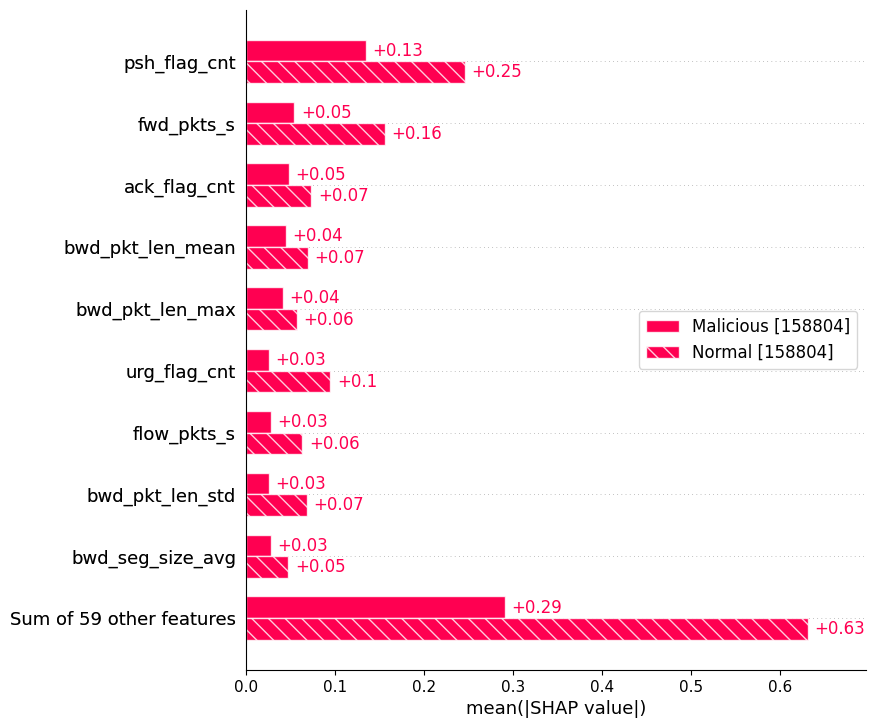

In [31]:
shap_value_testing, y_testing = explanations['BoT-IoT_us_MLP_CIC-IDS']
trafficType = ["Malicious" if x else "Normal" for x in  y_testing]
shap.plots.bar(shap_value_testing.cohorts(trafficType).abs.mean(0))

### Retrain on selected features

In [6]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from joblib import dump

In [7]:
model_type = "MLP" #"SVM"
modelList = {
    #"SVM":LinearSVC(random_state=17, max_iter=100_000),
    "SVM":SGDClassifier(random_state=17, max_iter=20_000),
    "MLP":MLPClassifier(random_state=17, hidden_layer_sizes=(10,10))
}

Features to drop:

> Selected from previous steps for not being on the top 10 of any successful model.
>
> This run is for CIC-IDS as target.

In [8]:
featureList = {
    "SVM": ['protocol', 'pkt_len_std', 'bwd_header_len', 'tot_bwd_pkts', 'subflow_bwd_pkts', 'pkt_len_max',
            'idle_min', 'fwd_header_len', 'fwd_act_data_pkts', 'active_max', 'pkt_len_mean', 'pkt_size_avg',
            'bwd_pkt_len_max', 'bwd_pkt_len_min', 'psh_flag_count', 'ack_flag_count', 'fwd_seg_size_avg',
            'fwd_pkt_len_mean'],
    #"SVM": ['flow_iat_max', 'fwd_iat_mean', 'fwd_iat_tot', 'flow_byts_s','flow_iat_mean', 'flow_iat_std'],
    "MLP": ['psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'dst_port', 'bwd_pkt_len_mean',
            'bwd_pkt_len_max', 'bwd_pkt_len_std', 'protocol', 'bwd_seg_size_avg', 'bwd_pkts_s', 'pkt_len_mean',
            'fwd_pkt_len_max', 'idle_mean','init_fwd_win_byts']
    #"MLP": ['bwd_iat_mean', 'flow_iat_std', 'fwd_iat_tot', 'flow_iat_max', 'bwd_iat_tot', 'flow_byts_s']
}
# 'init_fwd_win_byts, 'flow_pkts_s'
# 'flow_iat_min', 'fwd_iat_std', 'idle_mean'

ToN-IoT is chosen as source dataset for not having any successful model tested on CIC-IDS dataset.

In [9]:
data_set = "ToN-IoT" # "LAB-TRAP" #

for model_type in ["SVM", "MLP"]:
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    # Get test data
    X_train, y_train = get_target(data_set, data_set, frac=0)
    
    # Change from feature selection step
    features_to_drop = [to_go for to_go in X_train.columns.to_list() if to_go in featureList[model_type]] #not in
    X_train.drop(features_to_drop, axis=1, inplace=True)

    prep = StandardScaler()
    prep.fit(X_train)
    dump(prep,'./explanations/{0}_FS2_{1}_prep.pkl'.format(data_set, model_type))

    model = modelList[model_type]
    model.fit(prep.transform(X_train), y_train)
    dump(model, "./explanations/{0}_FS2_{1}.joblib".format(data_set, model_type))

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2023-10-17 11:24:16
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2023-10-17 11:25:36
setTarget: Removed 2800319 flows from other attack types

2023-10-17 11:25:52
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2023-10-17 11:28:14
setTarget: Removed 2800319 flows from other attack types

2023-10-17 11:32:20


## Test new models

In [10]:
import datetime
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn import metrics


ToN-IoT is chosen as source dataset for not having any successful model tested on CIC-IDS dataset.

In [11]:
source_set = "ToN-IoT" # "LAB-TRAP" #
tabular = {col:list() for col in ["Target", "Model", "TN", "FP", "FN", "TP"]}
for data_set in compatibilityMap.keys():
    print("Loading data set: {0}".format(data_set))
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    X_test, y_test = get_target(data_set, source_set, frac=0)

    for model_type in ["SVM", "MLP"]:
        prep = load('./explanations/{0}_FS2_{1}_prep.pkl'.format(source_set, model_type))
        model = load("./explanations/{0}_FS2_{1}.joblib".format(source_set, model_type))

        features_to_drop = [to_go for to_go in X_test.columns.to_list() if to_go in featureList[model_type]] #not in
        X = X_test.drop(features_to_drop, axis=1)[prep.feature_names_in_]
        y_pred = model.predict(prep.transform(X))
        score = metrics.confusion_matrix(y_test,y_pred).reshape(4)

        # [TN, FP, FN, TP]
        tabular["Target"].append(data_set)
        tabular["Model"].append(model_type)
        tabular["TN"].append(score[0])
        tabular["FP"].append(score[1])
        tabular["FN"].append(score[2])
        tabular["TP"].append(score[3])

df = pd.DataFrame(tabular)
df

Loading data set: LAB-TRAP
2023-10-17 11:33:29
Loading data set from existing file: AB-TRAP_CIC.csv
reading file: 
Loading data set: NB15
2023-10-17 11:36:07
Loading data set from existing file: NB15_CIC.csv
reading file: 
2023-10-17 11:36:13
setTarget: Removed 1911 flows from other attack types

Loading data set: CIC-IDS
2023-10-17 11:36:17
Loading data set from existing file: CIC-IDS_CIC.csv
reading file: 
2023-10-17 11:37:33
setTarget: Removed 397751 flows from other attack types

Loading data set: ToN-IoT
2023-10-17 11:37:37
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2023-10-17 11:39:39
setTarget: Removed 2800319 flows from other attack types

Loading data set: BoT-IoT
2023-10-17 11:39:48
Loading data set from existing file: BoT-IoT_CIC.csv
reading file: 
2023-10-17 12:59:48
setTarget: Removed 9824925 flows from other attack types

Loading data set: WAB-TRAP
2023-10-17 13:00:59
Loading data set from existing file: internet_CIC.csv
reading file: 
2023-10-17 

,Target,Model,TN,FP,FN,TP
0,LAB-TRAP,SVM,9132323,30,162023,0
1,LAB-TRAP,MLP,9121021,11332,162023,0
2,NB15,SVM,21407,11641,401,0
3,NB15,MLP,33048,0,401,0
4,CIC-IDS,SVM,147536,11268,158719,85
5,CIC-IDS,MLP,157507,1297,158804,0
6,ToN-IoT,SVM,2504304,9755,19018,17187
7,ToN-IoT,MLP,2512543,1516,16765,19440
8,BoT-IoT,SVM,82769,6465,3509887,3523
9,BoT-IoT,MLP,89192,42,3510538,2872


In [12]:
from math import sqrt

Def MCC helper function

In [13]:
def mcc(x: pd.DataFrame, debug: bool=False) -> float:
  '''
      Calculate MCC from coefficients of a confusion matrix.
  '''
  Ts = x[["TN","TP"]].to_numpy()
  Fs = x[["FN","FP"]].to_numpy()
  if len(Ts.shape) == 1:
    Ts = Ts.reshape(1,-1)
    Fs = Fs.reshape(1,-1)

  if debug:
    print(Ts)
    print(Ts)
    print(Ts.prod() - Fs.prod())
    print((Ts + Fs.T))
    print((Ts + Fs.T).prod())

  temp = sqrt((Ts + Fs.T).prod())
  return (Ts.prod() - Fs.prod())/temp if temp else .0

# Test from example in wikipedia
mcc(pd.DataFrame([[6,1,2,3]], columns=["TP", "FP", "FN", "TN"]))

0.47809144373375745

In [14]:
df["MCC"] = df.apply(mcc, axis=1)

df

,Target,Model,TN,FP,FN,TP,MCC
0,LAB-TRAP,SVM,9132323,30,162023,0,-0.000239
1,LAB-TRAP,MLP,9121021,11332,162023,0,-0.004654
2,NB15,SVM,21407,11641,401,0,-0.080480
3,NB15,MLP,33048,0,401,0,0.000000
4,CIC-IDS,SVM,147536,11268,158719,85,-0.189654
5,CIC-IDS,MLP,157507,1297,158804,0,-0.064034
6,ToN-IoT,SVM,2504304,9755,19018,17187,0.544801
7,ToN-IoT,MLP,2512543,1516,16765,19440,0.702840
8,BoT-IoT,SVM,82769,6465,3509887,3523,-0.211187
9,BoT-IoT,MLP,89192,42,3510538,2872,0.001896


In [15]:
df.to_csv("./explanations/{}_Conf_Matrix2.csv".format(source_set))

Focusing on results for the main target and the chosen source dataset

In [16]:
df[df["Target"].isin([source_set, "CIC-IDS"])][["Target", "Model", "MCC"]]

,Target,Model,MCC
4,CIC-IDS,SVM,-0.189654
5,CIC-IDS,MLP,-0.064034
6,ToN-IoT,SVM,0.544801
7,ToN-IoT,MLP,0.702840


Set F1-score

In [17]:
#df["f1-score"] = df[]
df["f1-score"] = 2*df["TP"]/(2*df["TP"]+df["FP"]+df["FN"])
df[df["Target"].isin([source_set, "CIC-IDS"])][["Target", "Model", "f1-score", "MCC"]]
#df[["Target", "Model", "f1-score", "MCC"]]


,Target,Model,f1-score,MCC
4,CIC-IDS,SVM,0.000999,-0.189654
5,CIC-IDS,MLP,0.000000,-0.064034
6,ToN-IoT,SVM,0.544349,0.544801
7,ToN-IoT,MLP,0.680184,0.702840


In [37]:
model.score(X, y_test)

0.9907206519844186

In [44]:
#metrics.confusion_matrix(y_test,y_pred)
metrics.accuracy_score(y_test,y_test)# model.predict(X))

1.0

Build table

In [18]:
MCCtable = df[df["Target"].isin([source_set, "CIC-IDS"])].pivot_table(values=["MCC", "f1-score"], index=["Model", "Target"]).fillna("")[["f1-score", "MCC"]]
MCCtable

f1-score       MCC
Model Target                     
MLP   CIC-IDS  0.000000 -0.064034
      ToN-IoT  0.680184  0.702840
SVM   CIC-IDS  0.000999 -0.189654
      ToN-IoT  0.544349  0.544801

Check feature names

In [24]:
for name, fts in featureList.items():
    print(name)
    print(", ".join(fts))

SVM
protocol, pkt_len_std, bwd_header_len, tot_bwd_pkts, subflow_bwd_pkts, pkt_len_max, idle_min, fwd_header_len, fwd_act_data_pkts, active_max, pkt_len_mean, pkt_size_avg, bwd_pkt_len_max, bwd_pkt_len_min, psh_flag_count, ack_flag_count, fwd_seg_size_avg, fwd_pkt_len_mean
MLP
psh_flag_count, ack_flag_count, urg_flag_count, dst_port, bwd_pkt_len_mean, bwd_pkt_len_max, bwd_pkt_len_std, protocol, bwd_seg_size_avg, bwd_pkts_s, pkt_len_mean, fwd_pkt_len_max, idle_mean, init_fwd_win_byts


Save the table as LaTeX

In [19]:
tableName = "after_FS_table_{}".format(source_set)
mycaption = "F1-scores and MCC for {} trained models after feature selection".format(source_set)
mylabel = "tab:after_FS_table_{}".format(source_set)

with open("./explanations/{0}.tex".format(tableName),"w") as f:
    f.write(MCCtable.to_latex(caption=mycaption, label=mylabel, position="H"))

# Test model's feature importance

In [65]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
X, y = get_target("CIC-IDS","CIC-IDS")

datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

2023-10-15 21:55:18
Loading data set from existing file: CIC-IDS_CIC.csv
reading file: 
2023-10-15 21:56:12
setTarget: Removed 397751 flows from other attack types



'2023-10-15 21:56:17'

In [66]:
y.value_counts()

0    158804
1    158804
Name: Label, dtype: int64

In [67]:
M, pre = get_model("SVM", "CIC-IDS")

Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LinearSVC from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [68]:
X_after = pre.transform(X)
X_after

X has feature names, but StandardScaler was fitted without feature names


array([[ 2.35537022, -0.8342212 , -0.35880929, ..., -0.08463859,
        -0.26940378, -0.25715651],
       [ 2.36784775, -0.8342212 , -0.35880929, ..., -0.08463859,
        -0.26940378, -0.25715651],
       [ 2.36284643, -0.8342212 , -0.35878424, ..., -0.08463859,
        -0.26940378, -0.25715651],
       ...,
       [ 1.27889925, -0.8342212 , -0.35880751, ..., -0.08463859,
        -0.26940378, -0.25715651],
       [-0.47811298, -0.8342212 , -0.35799802, ..., -0.08463859,
        -0.26940378, -0.25715651],
       [-0.4795051 ,  1.1958163 , -0.35000684, ..., -0.08463859,
        -0.26940378, -0.25715651]])

In [69]:
M.best_estimator_.predict(X_after[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
shap_values = explainTrial(M, X_after)

datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

2023-10-15 21:57:03


PermutationExplainer explainer: 317609it [2:09:35, 40.81it/s]                              


'2023-10-16 00:06:45'

In [71]:
shap_values.feature_names = X.columns.to_list()

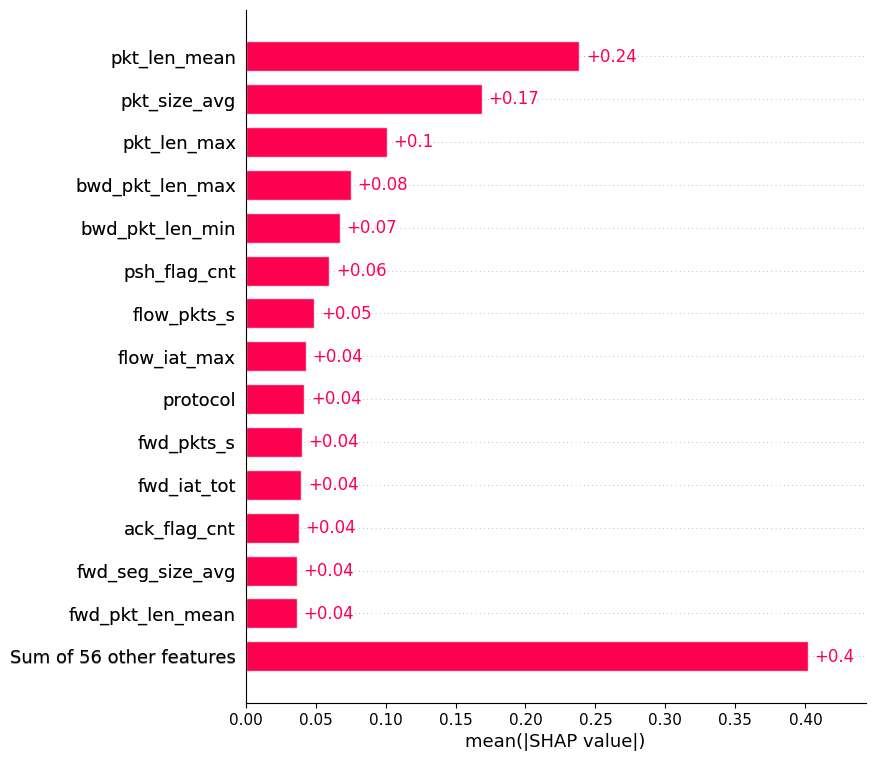

In [73]:
#bar plot
shap.plots.bar(shap_values, max_display=15, show=False)
plt.savefig("./explanations/SHAP_BAR_{0}.jpg".format("CIC-IDS_SVM_CIC-IDS"), bbox_inches="tight")
#plt.close()

#violin plot
#shap.summary_plot(shap_values, max_display=11, show=False, plot_type='violin') #plot_size="auto"/(11,8)
#plt.savefig("./dissertation/explain_{0}_{1}_{2}_DS_violin.jpg".format(trainerDSName, mName, testerDSName), bbox_inches="tight")
#plt.close()

In [21]:
import gc

gc.collect()

234